# This is a visualization of usage over time fo the Toronto Bike data available through Open Data from the City of Toronto

## Historical data can be found: https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/

In [1]:
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt
#import numpy as np

url_pkg = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "7e876c24-177c-4605-9cef-e50dd74c617f"}
pkg = "7e876c24-177c-4605-9cef-e50dd74c617f"
package = requests.get(url_pkg, params = params).json()


#print the available files, their format, size, and ID
print("Available Datasets\n")
print("name\t", "format\t\t", "size\t\t", "ID")
print("----------------------------------------------------------------------------------")
for d in (package["result"]['resources']):
    print(d['name'], d["format"], d['size'],d['id'])
data_list = [ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

#Accessing of dataset Bike share ridership 2021-01
url = package["result"]['resources'][8]['url']
data = requests.get(url).content
decoded_data = data.decode("ISO-8859-1")
d = pd.read_csv(io.StringIO(decoded_data), sep = ",")

#Append all data for 2021
for i in data_list:
    url = package["result"]['resources'][i]['url']
    data = requests.get(url).content
    decoded_data = data.decode("ISO-8859-1")
    t = pd.read_csv(io.StringIO(decoded_data), sep = ",")
    t.columns = ['Trip Id', 'Trip  Duration', 'Start Station Id', 'Start Time',
       'Start Station Name', 'End Station Id', 'End Time', 'End Station Name',
       'Bike Id', 'User Type']
    d = d.append(t)

#Print column names
print("\nData dataframe columns\n",list(d.columns))

#Convert to datetime and add column called "Length" for duration of trip
d['Start Time'] = pd.to_datetime(d['Start Time'], format = "%m/%d/%Y %H:%M")
d['End Time'] = pd.to_datetime(d['End Time'], format = "%m/%d/%Y %H:%M")


Available Datasets

name	 format		 size		 ID
----------------------------------------------------------------------------------
bikeshare-ridership-readme XLSX 16625 a1a0ee42-caf5-4395-abbc-58925c7434dd
bikeshare-ridership-2014-q4-2015-q3 XLSX 1465200 f931a332-09de-494b-afb0-c811c6ec4043
bikeshare-ridership-2016-q3 XLSX 18885816 34c07f2a-abde-4d4f-9ee6-267a312f68e6
bikeshare-ridership-2016-q4 XLSX 9822853 fe1fc5c4-ba3e-480e-ad70-db5dc3097242
bikeshare-ridership-2017 ZIP 24484084 3bcb847b-bf1e-43a6-a385-8afef74ee840
Bike Share Ridership 2018 ZIP 34011563 81ea3260-057a-4e62-ae45-1f40191a8229
Bike Share Ridership 2019  ZIP 324112878 f57f20db-8353-44f7-ab61-d499ac1b31c1
Bike share ridership 2020 ZIP 389354150 5f5d78c4-d810-4048-9dac-c18273abffac
Bike share ridership 2021-01 CSV 11528928 d4a7b25c-edd0-4c1b-954a-79b6559477c4
Bike share ridership 2021-02 CSV 7835416 d4a5ef48-2006-4e2b-b9a9-d6791ea04004
Bike share ridership 2021-03 CSV 21013317 9ab4727e-06e4-402b-a467-f411f03ffb66
Bike share r

#### Define simple numerical data histogram plotting function

In [4]:
def HistPlot(data, text_size, ylabel, xlabel, title, xticks, xrot, **kwargs):
    fig, ax = plt.subplots()
    ax.set_xlabel(xlabel, size = text_size)
    ax.set_ylabel(ylabel, size = text_size)
    ax.set_title(title, size = text_size+2)
    data.plot(**kwargs, fontsize = text_size, ax = ax)
    if xticks != False:
        ax.set_xticklabels(xticks)
    plt.xticks(rotation=xrot)
    return()


Plot a histograms of trip duration, start location, and end location

()

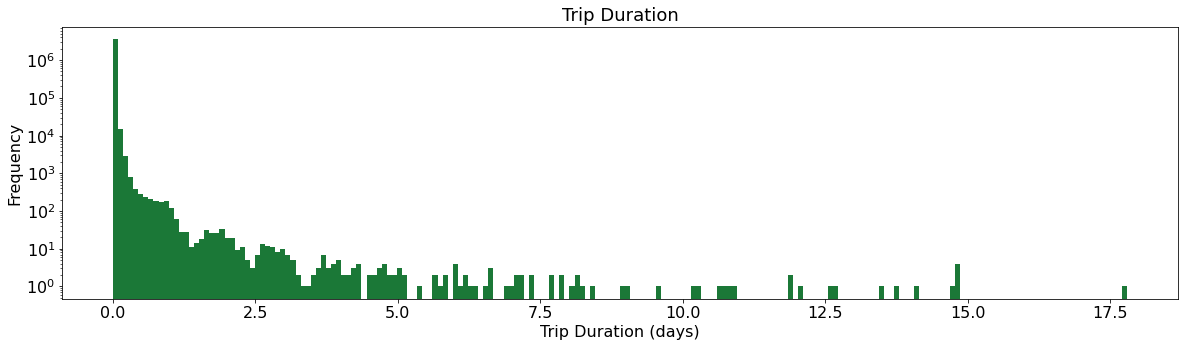

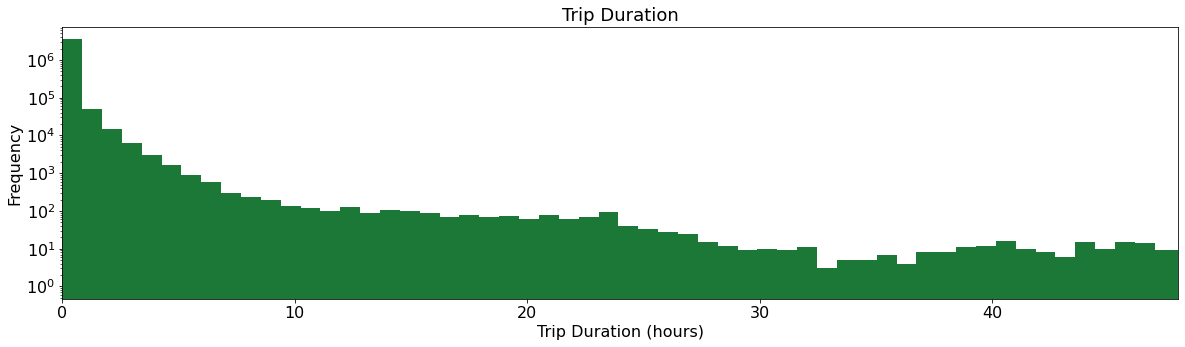

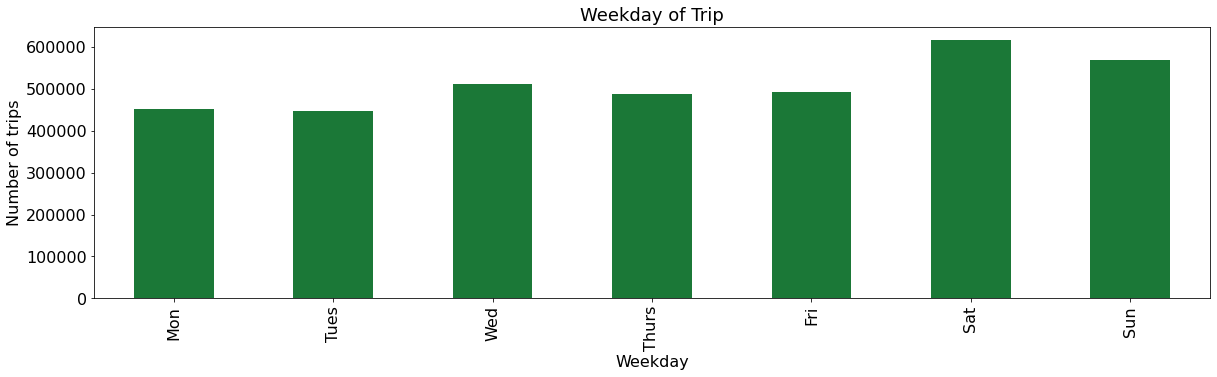

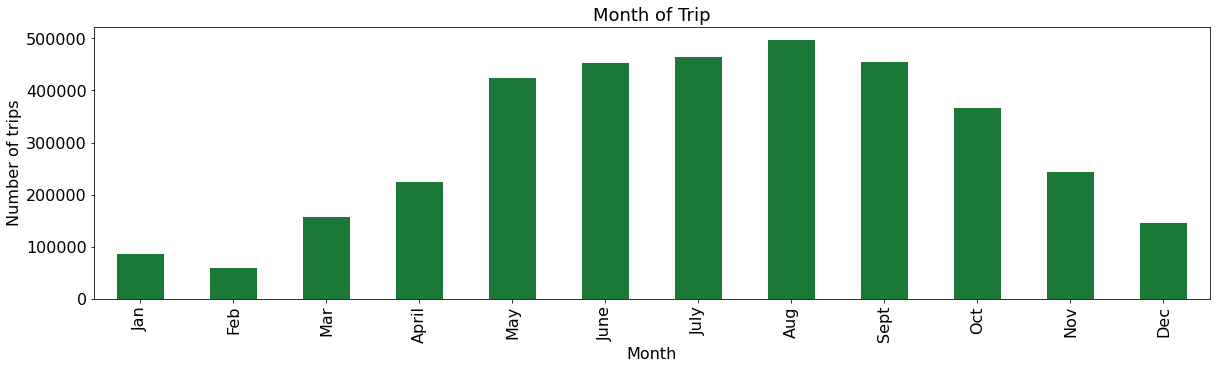

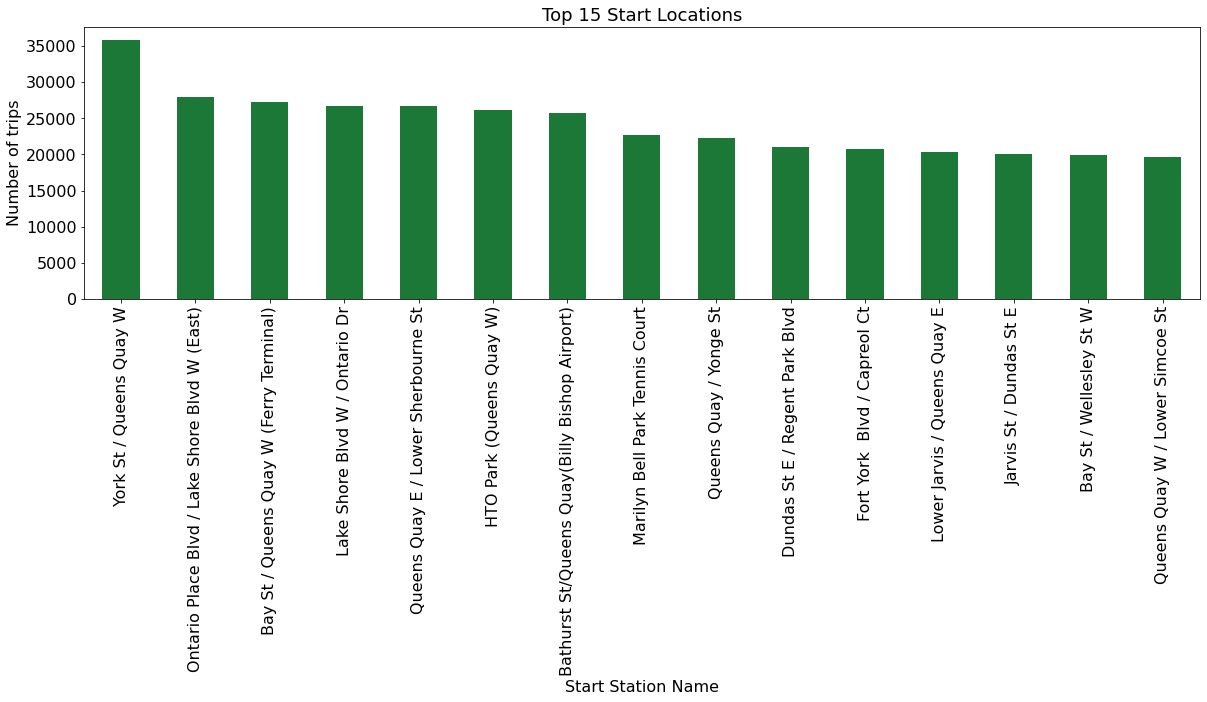

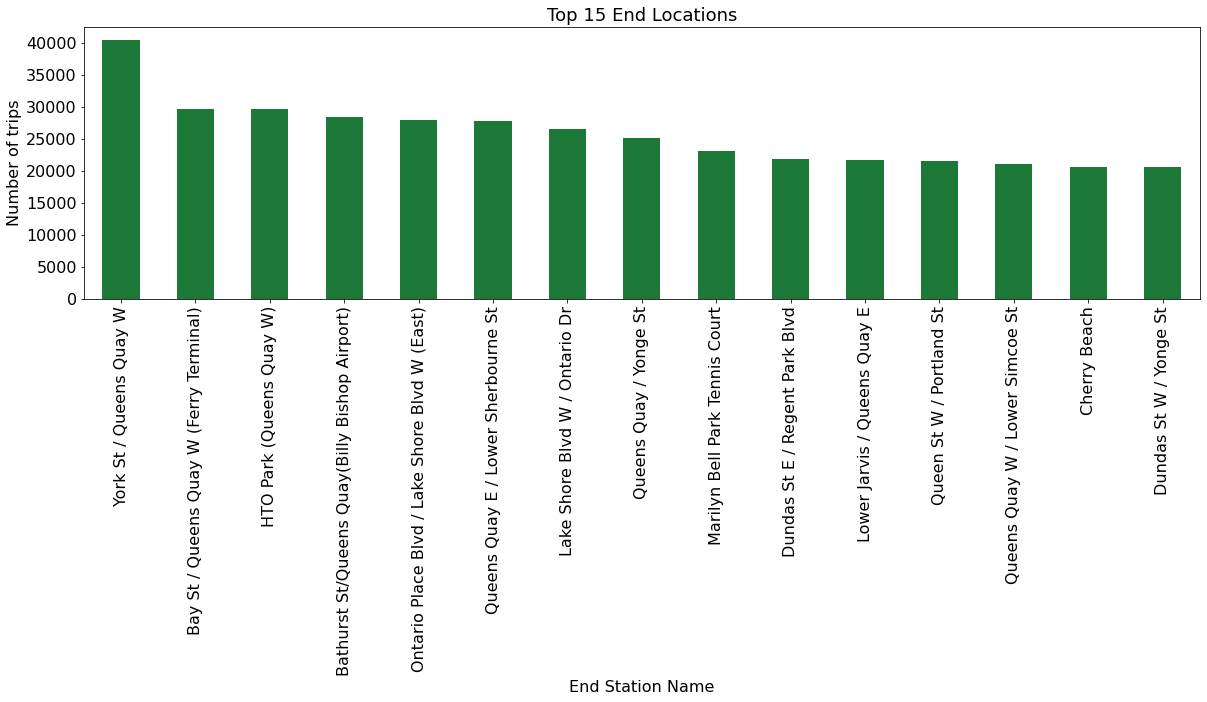

In [5]:
#Plot duration histrogram (maybe someone stole a bike....)
HistPlot(d['Trip  Duration']/(3600*24), 16, "Number of Trips", "Trip Duration (days)","Trip Duration", False, 0, kind = "hist", bins = 200, color = "#1b7837", figsize = (20,5), logy = True)
HistPlot(d['Trip  Duration']/(3600), 16, "Number of Trips", "Trip Duration (hours)","Trip Duration", False, 0, kind = "hist", bins = 500, color = "#1b7837", figsize = (20,5), logy = True, xlim = (0,48))

#Plot start time
df = d.groupby(d["Start Time"].dt.weekday).size().reset_index()
df.columns = ["Weekday", 'count']
xticks = ["Mon", "Tues", "Wed", "Thurs", "Fri", "Sat", "Sun"]
HistPlot(df, 16, "Number of trips", "Weekday", "Weekday of Trip",xticks, 90, kind = "bar", x="Weekday", y = "count", color = "#1b7837", figsize = (20,5), legend = False)

#Plot start time
df = d.groupby(d["Start Time"].dt.month).size().reset_index()
df.columns = ["Month", 'count']
xticks = ["Jan", "Feb", "Mar","April", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
HistPlot(df, 16, "Number of trips", "Month", "Month of Trip",xticks, 90, kind = "bar", x="Month", y = "count", color = "#1b7837", figsize = (20,5), legend = False)

#Plot trip start location
df = d.groupby(["Start Station Name"]).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
df.columns = ["Start Station Name", 'count']
HistPlot(df, 16, "Number of trips", "Start Location Name", "Top 15 Start Locations",False, 90, kind = "bar", x="Start Station Name", y = "count", color = "#1b7837", figsize = (20,5), legend = False)

#Plot trip end location
df = d.groupby(["End Station Name"]).size().to_frame().sort_values([0], ascending = False).head(15).reset_index()
df.columns = ["End Station Name", 'count']
HistPlot(df, 16, "Number of trips", "End Location Name","Top 15 End Locations", False, 90, kind = "bar", x="End Station Name", y = "count", color = "#1b7837", figsize = (20,5), legend = False)

In [25]:
df_weath = pd.read_csv("en_climate_daily_ON_6158355_2021_P1D.csv", skipinitialspace=True)
print("\nWeather dataframe columns\n",list(df_weath.columns), "\n")

df_weath["Day of Year"] = pd.to_datetime(df_weath['Date/Time'], format = "%Y-%m-%d").dt.dayofyear
d["Day of Year"] = d["Start Time"].dt.dayofyear

#add temperature informaiton to dataframe with map from statcan weather data
d['Mean Temp (°C)'] = d["Day of Year"].map(df_weath.set_index("Day of Year")['Mean Temp (°C)'])

#Some data is missing, drop these rows
d = d[d['Mean Temp (°C)'].notna()]

#Use dictionary of temperature data to add mean temp column to grouped data based on count
temp_dict = df_weath['Mean Temp (°C)'].to_dict()
df = d.groupby(d["Start Time"].dt.dayofyear).size().reset_index()
df.columns = ['Start Time', 'count']
df['Mean Temp (°C)'] = df.index.map(temp_dict)
df = df[df['Mean Temp (°C)'].notna()]
print("Summary of ridership data by day\n",df.describe())


Weather dataframe columns
 ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID', 'Date/Time', 'Year', 'Month', 'Day', 'Data Quality', 'Max Temp (°C)', 'Max Temp Flag', 'Min Temp (°C)', 'Min Temp Flag', 'Mean Temp (°C)', 'Mean Temp Flag', 'Heat Deg Days (°C)', 'Heat Deg Days Flag', 'Cool Deg Days (°C)', 'Cool Deg Days Flag', 'Total Rain (mm)', 'Total Rain Flag', 'Total Snow (cm)', 'Total Snow Flag', 'Total Precip (mm)', 'Total Precip Flag', 'Snow on Grnd (cm)', 'Snow on Grnd Flag', 'Dir of Max Gust (10s deg)', 'Dir of Max Gust Flag', 'Spd of Max Gust (km/h)', 'Spd of Max Gust Flag'] 

Summary of ridership data by day
        Start Time         count  Mean Temp (°C)
count  359.000000    359.000000      359.000000
mean   181.440111   9761.696379       10.895822
std    105.465746   6074.524448        9.928659
min      1.000000    708.000000      -10.800000
25%     90.500000   4098.000000        2.550000
50%    180.000000   9407.000000       10.500000
75%    271.500000  14388.500

(359, 1) (359,)


Text(0, 0.5, 'Number of riders')

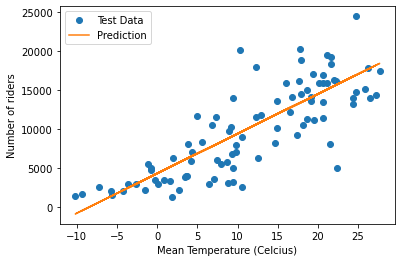

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature_cols = ['Mean Temp (°C)']
X = df.loc[:, feature_cols]
y = df.loc[:, "count"]
print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True)

#instantiate model
logreg = LinearRegression()

#fit 
logreg.fit(X_train, y_train)

#predict
y_pred = logreg.predict(X_test)

plt.plot(X_test, y_test, 'o', color = "#1b7837", label = "Test Data")
plt.plot(X_test, y_pred, label = "Prediction")
plt.legend()
plt.xlabel("Mean Temperature (Celcius)", size = 14)
plt.ylabel("Number of riders", size = 14)